In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.optimize import curve_fit

In [3]:
old_data=loadtxt('./old.dat')

In [4]:
old_data

array([[5.000e-01, 1.380e+02, 1.210e+02, 1.020e+02, 1.020e+02, 1.140e+02],
       [1.000e+00, 9.220e+02, 8.780e+02, 8.230e+02, 8.760e+02, 8.050e+02],
       [1.500e+00, 2.728e+03, 2.778e+03, 2.619e+03, 2.755e+03, 2.742e+03],
       [2.000e+00, 4.174e+03, 4.312e+03, 4.140e+03, 4.350e+03, 4.218e+03],
       [2.500e+00, 5.110e+03, 5.132e+03, 5.032e+03, 5.012e+03, 5.046e+03],
       [3.000e+00, 5.453e+03, 5.503e+03, 5.427e+03, 5.614e+03, 5.453e+03],
       [3.500e+00, 5.524e+03, 5.646e+03, 5.700e+03, 5.571e+03, 5.652e+03],
       [4.000e+00, 5.616e+03, 5.670e+03, 5.583e+03, 5.684e+03, 5.553e+03],
       [4.500e+00, 5.405e+03, 5.297e+03, 5.500e+03, 5.276e+03, 5.400e+03],
       [5.000e+00, 5.197e+03, 5.195e+03, 5.124e+03, 5.053e+03, 4.989e+03],
       [5.500e+00, 4.723e+03, 4.790e+03, 4.775e+03, 4.795e+03, 4.885e+03],
       [6.000e+00, 4.349e+03, 4.637e+03, 4.389e+03, 4.472e+03, 4.522e+03],
       [6.500e+00, 4.204e+03, 4.263e+03, 4.206e+03, 4.225e+03, 4.113e+03],
       [7.000e+00, 3.761e

In [5]:
new_data=loadtxt('./new.dat')

In [6]:
new_data.shape

(37, 51)

In [7]:
x=old_data[:,0]-0.25
old_avg=mean(old_data[:,1:],axis=1)
new_avg=mean(new_data[:,1:],axis=1)

In [8]:
avg=average(x,weights=new_data[:,1])

In [9]:
avg

5.989134260073905

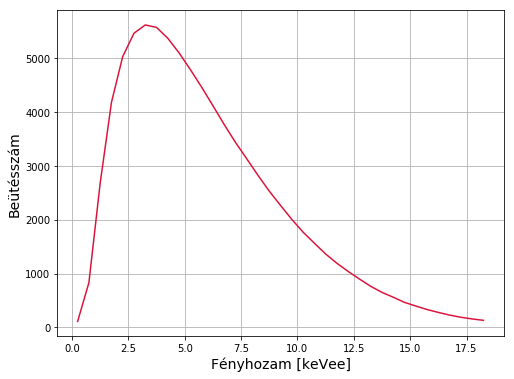

In [34]:
plot(x,new_avg,color='crimson')
xlabel('Fényhozam [keVee]',fontsize=14)
ylabel('Beütésszám',fontsize=14)
grid(True)
savefig('./beta.pdf',bbox_inches='tight')

In [27]:
old_average_value=average(x,weights=old_avg)

In [38]:
old_average_value

5.963136471041419

In [10]:
avg_list=[]
max_list=[]
for i in range (50):
    avg_list.append(average(x,weights=new_data[:,i+1]))
    max_list.append(new_data[:,i+1])

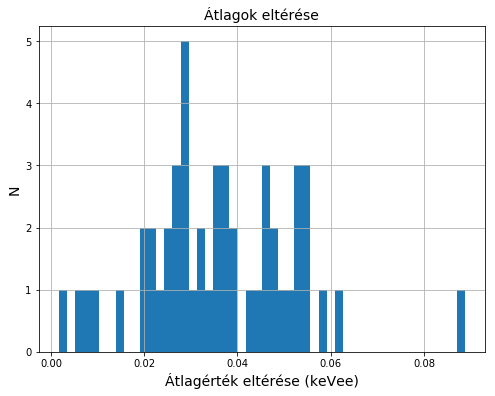

In [55]:
figsize(8,6)
title('Átlagok eltérése',fontsize=14)
t=pyplot.hist(avg_list-old_average_value,50)
xlabel('Átlagérték eltérése (keVee)',fontsize=14)
ylabel('N',fontsize=14)
grid(True)
savefig('./atlag.pdf',bbox_inches='tight')

In [42]:
diff_cves=zeros((new_data.shape[0],50))
for i in range (50):
    diff_cves[:,i]=new_data[:,i+1]-old_avg

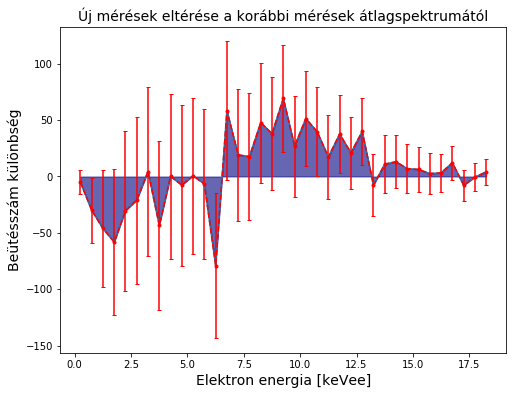

In [59]:
plot(x,mean(diff_cves,axis=1))
errorbar(x,mean(diff_cves,axis=1),sqrt(new_avg),color='red',fmt='--o',ms=3,capsize=2)
fill_between(x,mean(diff_cves,axis=1),alpha=0.6,color='navy')
xlabel('Elektron energia [keVee]',fontsize=14)
ylabel('Beütésszám különbség',fontsize=14)
title('Új mérések eltérése a korábbi mérések átlagspektrumától',fontsize=14)
savefig('./elteres.pdf',bbox_inches='tight')

In [60]:
from scipy import stats

In [61]:
stats.ttest_ind(old_avg,new_avg)

Ttest_indResult(statistic=-0.012362530223195334, pvalue=0.990170570922068)

In [62]:
avg_list

[5.989134260073905,
 5.9971845001170685,
 6.0004395321034245,
 5.9895530267480055,
 5.964842880734589,
 6.015700227811832,
 5.986768492509364,
 6.008798283261803,
 5.999284658864367,
 5.970750192088291,
 5.9783896704749315,
 5.984170954864996,
 5.97305680645464,
 5.9915191178710785,
 5.969306196440343,
 5.992501658538856,
 5.991557833089312,
 6.008951181767023,
 5.995743088366001,
 6.021911181043189,
 6.015353898605889,
 5.9945310594003045,
 5.989577103050347,
 5.99940686979185,
 6.00003204567966,
 5.984146169733384,
 5.993238188746289,
 5.982999753916824,
 6.018595913295272,
 5.982904635080834,
 5.98853275518575,
 5.990206475503006,
 6.014417788180222,
 6.010824259454396,
 5.9982212083963695,
 6.006445590850736,
 6.006786654960492,
 6.017795697666253,
 6.00238548497027,
 6.016193314633006,
 5.992197187712033,
 5.991255957190197,
 6.001426391171637,
 6.024895122922965,
 6.012917719741646,
 6.01116551651168,
 6.0087456867005145,
 6.017882731565224,
 5.999707950748815,
 6.05187781848929]

In [64]:
list_matrix=zeros((10,5))
for i in range (10):
    for j in range (5):
        list_matrix[i,j]=avg_list[5*i+j]

In [66]:
savetxt('./temp.dat',list_matrix,fmt='%.3f',delimiter=' & ', newline='\\ \n')

In [68]:
std(avg_list,ddof=1)

0.016233508802759693

In [70]:
(6.2-mean(avg_list))/std(avg_list,ddof=1)

12.376584050903485

In [13]:
new_avg

array([ 110.42,  830.96, 2678.32, 4180.62, 5036.06, 5469.1 , 5622.98,
       5577.92, 5375.74, 5103.94, 4794.32, 4467.08, 4123.28, 3773.26,
       3441.34, 3136.06, 2827.4 , 2534.  , 2268.02, 2008.82, 1771.2 ,
       1566.54, 1365.66, 1192.7 , 1040.52,  899.72,  763.88,  651.52,
        561.28,  465.38,  397.64,  332.58,  278.64,  229.38,  189.04,
        157.66,  131.64])

In [26]:
devsi=zeros(new_avg.shape)
for i in range (new_avg.shape[0]):
    devsi[i]=std(new_data[i,1:],ddof=1)

In [27]:
def fit_func(x,a,b):
    return(a*x**b)

In [28]:
popt, pcov = curve_fit(fit_func,new_avg,devsi)

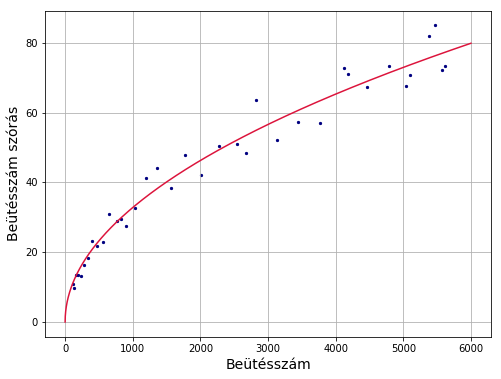

In [29]:
figsize(8,6)
scatter(new_avg,devsi,s=5,color='navy')
aa=linspace(0,6000,10000)
plot(aa,fit_func(aa,*popt),color='crimson')
grid(True)
xlabel('Beütésszám',fontsize=14)
ylabel('Beütésszám szórás',fontsize=14)
savefig('./poiss.pdf',bbox_inches='tight')

In [30]:
popt

array([1.06078018, 0.49671057])

In [31]:
sqrt(diag(pcov))

array([0.17880464, 0.02072145])